# Epidemic Modelling 

This notebook outlines the Python code used in Chapter 3: Epidemic Modelling of the thesis. Below, we shall explore the discretzation of deterministic compartmental models using Euler's Method, stochastic epidemic models and the use of Gillespi's algorithm  and, finally, we shall discuss stochastic parameter diffusion and the use of Euler-Murayama approximation for stochastic-ODE's.

**Index:**
* [Compartmental Models and the Effective Contact Rate](#compartmental-models-and-the-effective-contact-rate)
* [Stochastic Models and Gillespi's Algorithm](#stochastic-models-and-gillespi's-algorithm)
* [Latent Variables and Parameter Difussion](#latent-variables-and-parameter-difussion)

## 

In [1]:
# Import all the ncesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Compartmental Models and the Effective Contact Rate

Below we define the Euler approximation algorithm to the basic compartmental SIR model

In [4]:
def sir_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, I0, R0 = X0
    beta, gamma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        I[t] = I[t-1] + h*(beta*S[t-1]*I[t-1]/N - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return S,I,R

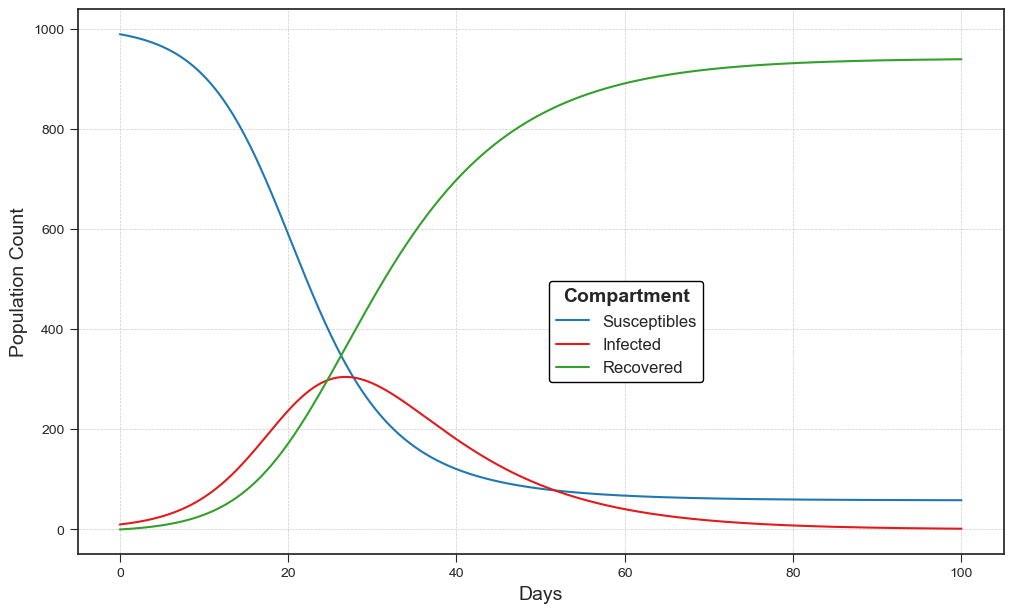

In [5]:
# EXAMPLE 1

N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 10
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)

S,I,R = sir_model(N, T, h, X0, params)

# Plot the results
time = np.linspace(0,T,int(T/h))

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.5, 0.3), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)

plt.show()

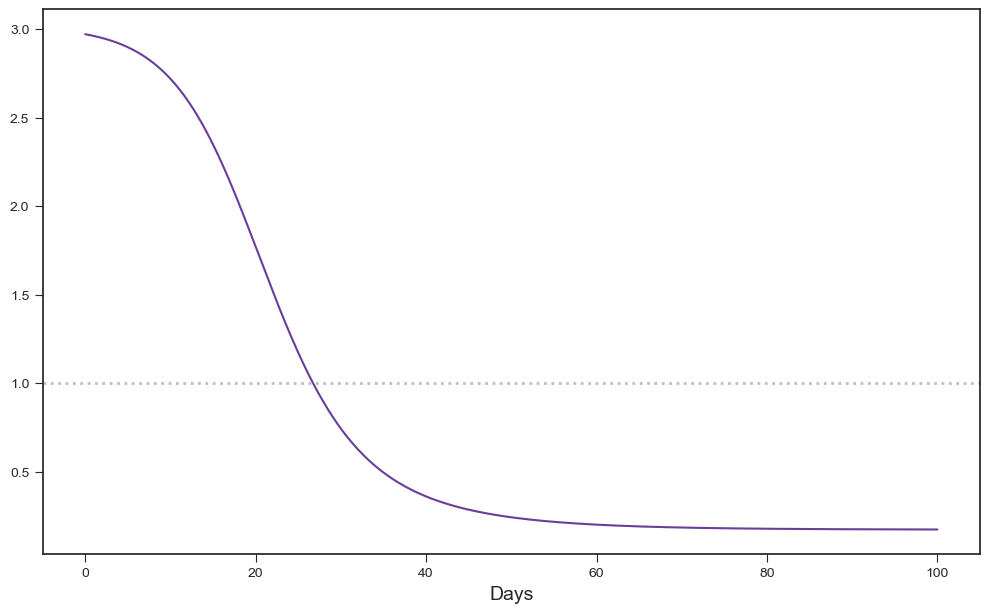

In [33]:
# Calculate the effective reproduction number
R_0 = beta / gamma
R_T = R_0 * S / N

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, R_T, color = colors[9])
plt.axhline(1, linestyle=':', linewidth=2, color=colors[8])

plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.show()

Following the same approach as above, we can also define an algorithm for our SEIR and SEIRDS models

In [39]:
def seir_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0 = X0
    beta, gamma, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N)
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1])
    
    return S,E,I,R

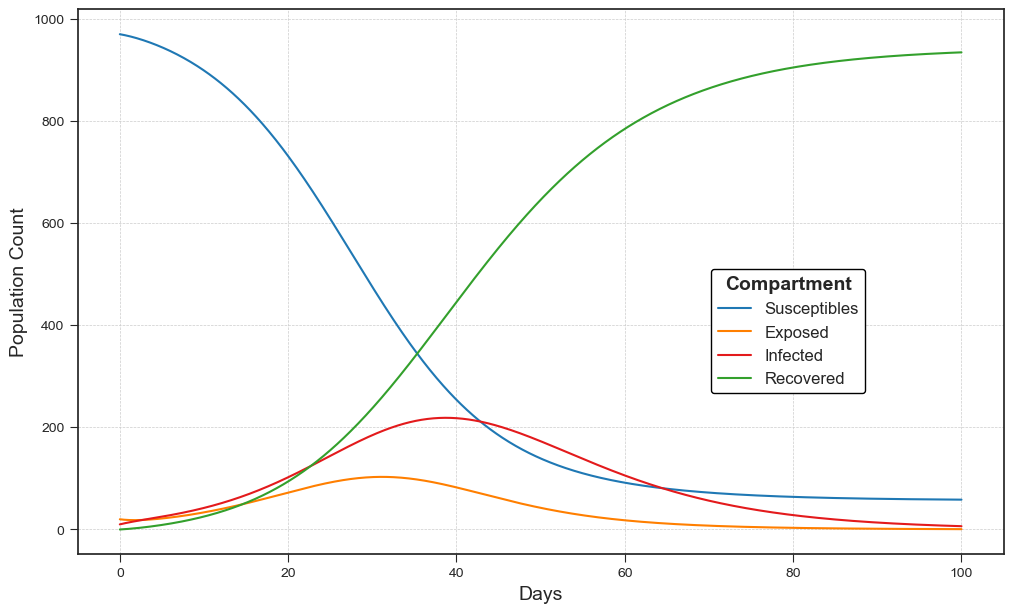

In [91]:
N = 1000 #Total population
T = 100 #Total number of days to simulate
h = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate
sigma = 0.25 #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0

X0 = (S0, E0, I0, R0)
params = (beta, gamma, sigma)

S,E,I,R = seir_model(N, T, h, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/h))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(10, 6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])

plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.675, 0.28), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)

plt.show()

In [88]:
def seirds_model(N, T, h, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/h)
    S0, E0, I0, R0, D0 = X0
    alpha, beta, gamma, mu, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    D = np.zeros(num_steps)

    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    D[0] = D0
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + h*(-beta*S[t-1]*I[t-1]/N + alpha*R[t-1])
        E[t] = E[t-1] + h*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + h*(sigma*E[t-1] - gamma*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + h*(gamma*I[t-1] - alpha*R[t-1])
        D[t] = D[t-1] + h*(mu*I[t-1])
    
    return S,E,I,R,D

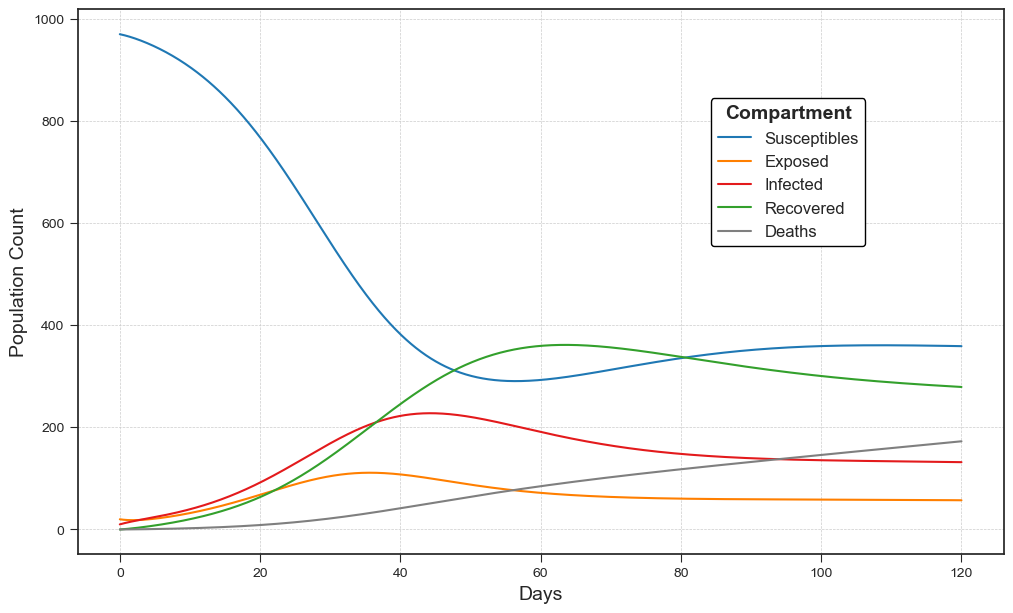

In [97]:
N = 1000 #Total population
T = 120 #Total number of days to simulate
h = 1/10 #Step size for state computation
alpha = 1/20 #Reinfection rate
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate
mu = 0.01 #Mortality Rate
sigma = 0.25 #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

S,E,I,R,D = seirds_model(N, T, h, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/h))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')
plt.figure(figsize=(10, 6))

plt.plot(time, S, label='Susceptibles', color=colors[1])
plt.plot(time, E, label='Exposed', color = colors[7])
plt.plot(time, I, label='Infected', color = colors[5])
plt.plot(time, R, label='Recovered', color=colors[3])
plt.plot(time, D, label='Deaths', color='#7f7f7f')


plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(
    bbox_to_anchor=(0.675, 0.55), 
    fontsize=12, 
    title='Compartment', 
    title_fontproperties={'weight': 'bold', 'size': 14},
    frameon=True,                  
    fancybox=True,                 
    framealpha=1,                   
    edgecolor='black',              
    facecolor='white')
plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.ylabel('Population Count', fontsize=14)
plt.show()

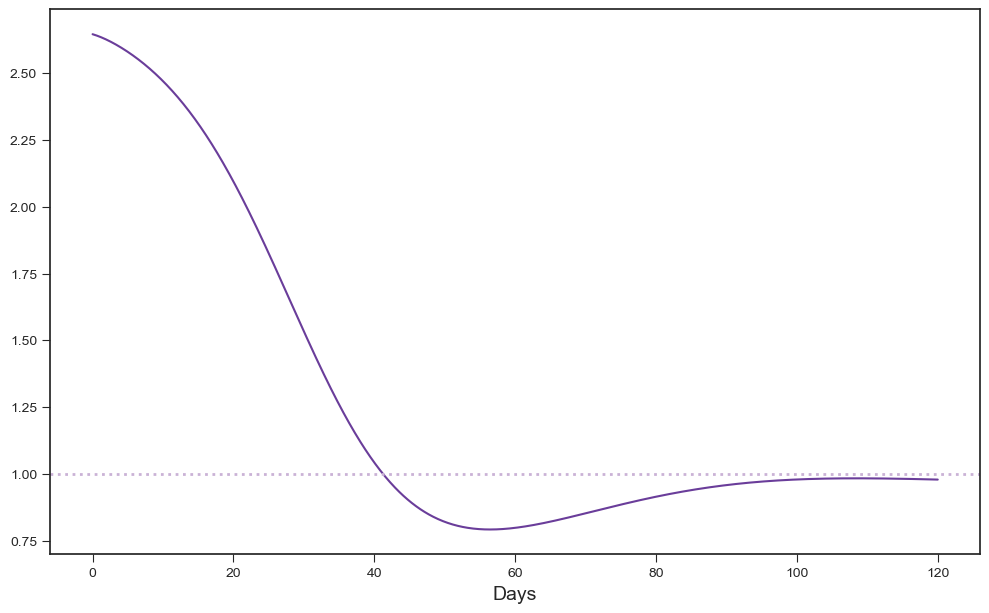

In [98]:
# Calculate the effective reproduction number
R_0 = beta/(gamma + mu)
R_T = R_0 * S/N

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-ticks')
colors = sns.color_palette('Paired')

plt.plot(time, R_T, color = colors[9])
plt.axhline(1, linestyle=':', linewidth=2, color=colors[8])

plt.tight_layout()
plt.xlabel('Days', fontsize=14)
plt.show()

## Stochastic Models and Gillespi's Algorithm

## Latent Variables and Parameter Difussion